## Importing libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Attaching the dataset

In [5]:
df = pd.read_csv('/Users/himanshukumarsingh/Downloads/internship/CodSoft/Titanic-Dataset.csv')

# displaying the first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# obtaining the descriptive statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# getting the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# getting the shape of the dataset
df.shape

(891, 12)

## Data Cleaning

In [12]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
# checking for missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# handling the missing values in 'Age' column using the median age
df['Age'].fillna(df['Age'].median(), inplace = True)

/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_7717/2662076743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [19]:
# dropping the "Cabin" column as it has no significant in the analysis process
df = df.drop('Cabin', axis = 1)

In [21]:
# dropping the rows of "Embarked" column having null values
df.dropna(subset=['Embarked'], inplace=True)

In [22]:
# finally checking for null values after cleaning the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization 

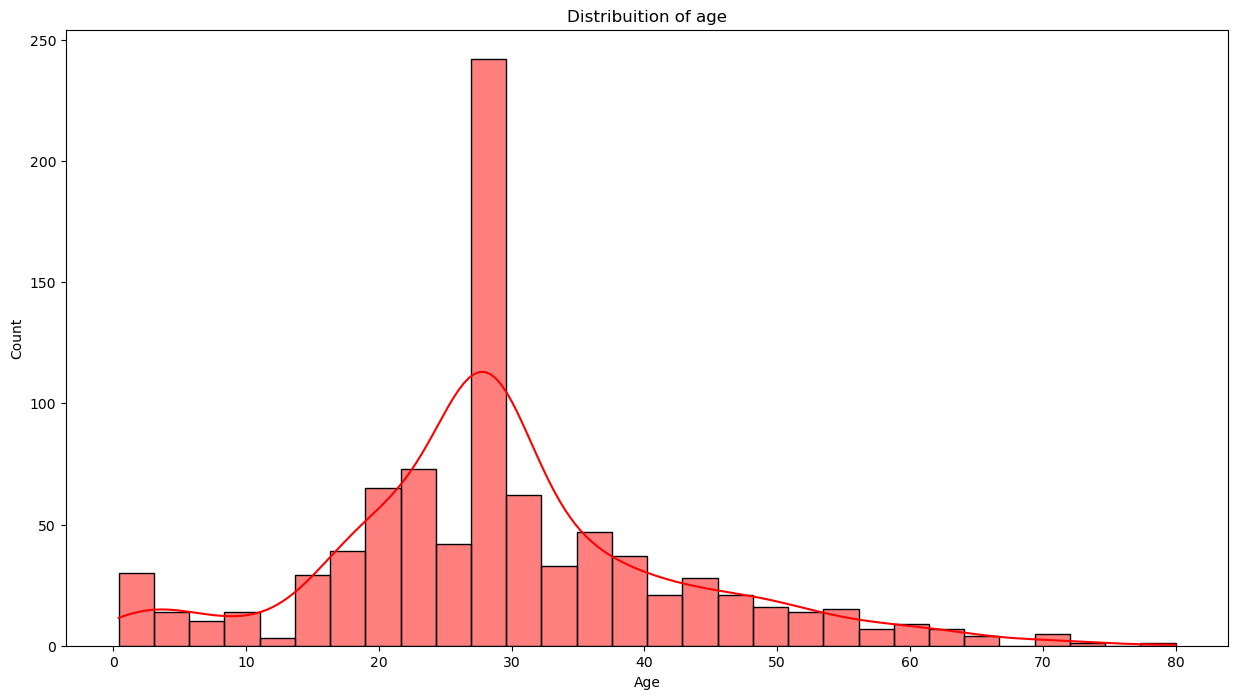

In [37]:
# visualising the distribution of age on the titanic
plt.figure(figsize = (15,8))
sns.histplot(df['Age'], color = 'red', kde = True)
plt.title('Distribuition of age')
plt.show()

### From the histogram it's clear that most of the passengers travelling on the titanic was of the age group 20-30

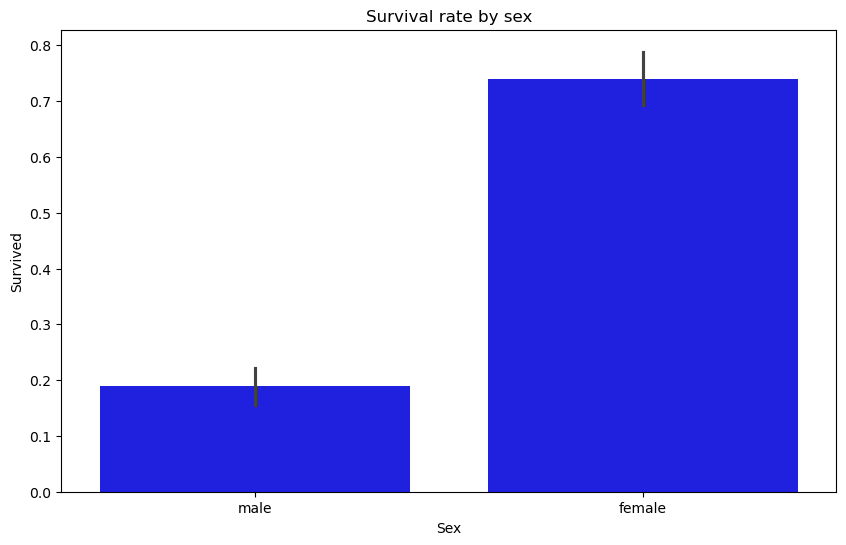

In [47]:
# Survival rate by sex
plt.figure(figsize = (10,6))
sns.barplot(x = df['Sex'], y = df['Survived'], color = 'blue')
plt.title('Survival rate by sex')
plt.show()

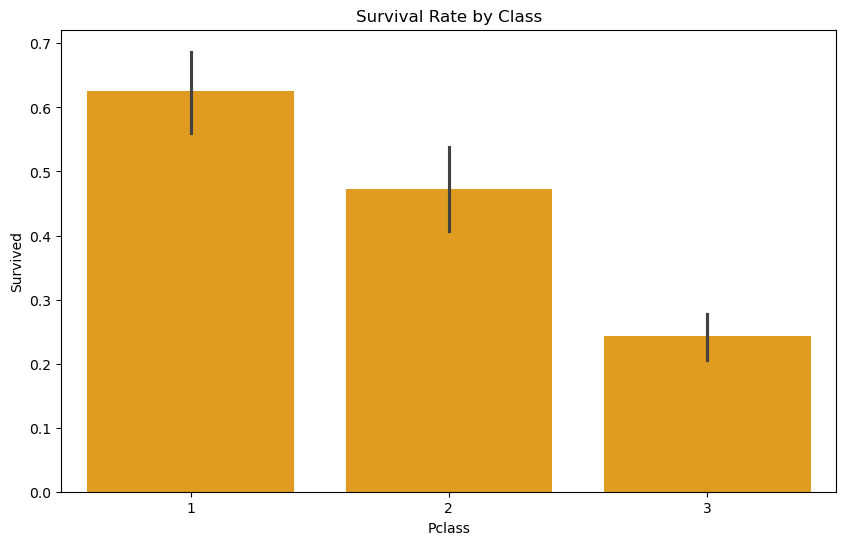

In [48]:
# survival rate by class
plt. figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, color = 'orange')
plt. title( 'Survival Rate by Class')
plt. show()

# Preprocessing and Feature Engineering

In [53]:
# passenger id, name, ticket number and ticket fare has no effect on the survival of a person so we can drop the columns "PassengerId","Name","Ticket" and "Fare"
col_to_drop = ['PassengerId', 'Name', 'Ticket','Fare']
df = df.drop(col_to_drop, axis = 1)

In [59]:
# converting categorical variable "Sex" and "Embarked" to numerical form
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [69]:
# normalising the "Age" column using Standard Scaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))

## Model fitting

In [74]:
# defining feature and target variable
X = df.drop('Survived', axis = 1)
y = df['Survived']
# splitting the data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [79]:
# defining the models
rf = RandomForestClassifier(n_estimators=50, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
lr = LogisticRegression(random_state=42)

In [80]:
# creating an ensembled model 
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svm', svm)], voting='soft')

# train the ensemble model
ensemble.fit(X_train, y_train)

# predict the test set labels
y_pred = ensemble.predict(X_test)

In [82]:
# evaluating the mnodel
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))

Accuracy =  0.8089887640449438
Classification report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.80      0.67      0.73       102

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

Confusion matrix
 [[148  17]
 [ 34  68]]


### CONCLUSION : We fitted an ensembled model using Logistic Regression, Random Forest Classifier and Support Vector Machine on the titanic dataset to predict the survival of a passenger and we got an accuracy of around 80%. Tuning some hyperparameters, this accuracy can be increased too.